# Credit Default Analysis

## Business Understanding

### Problem Statement

### Objectives

## Data Understanding

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install xlrd
warnings.filterwarnings('ignore')

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 262.6 kB/s eta 0:00:01
   ---------------- ----------------------- 41.0/96.5 kB 281.8 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 501.7 kB/s eta 0:00:00


In [75]:
df = pd.read_excel('default+of+credit+card+clients/default of credit card clients.xls', skiprows=1)

In [76]:
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [77]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [79]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Data Cleaning

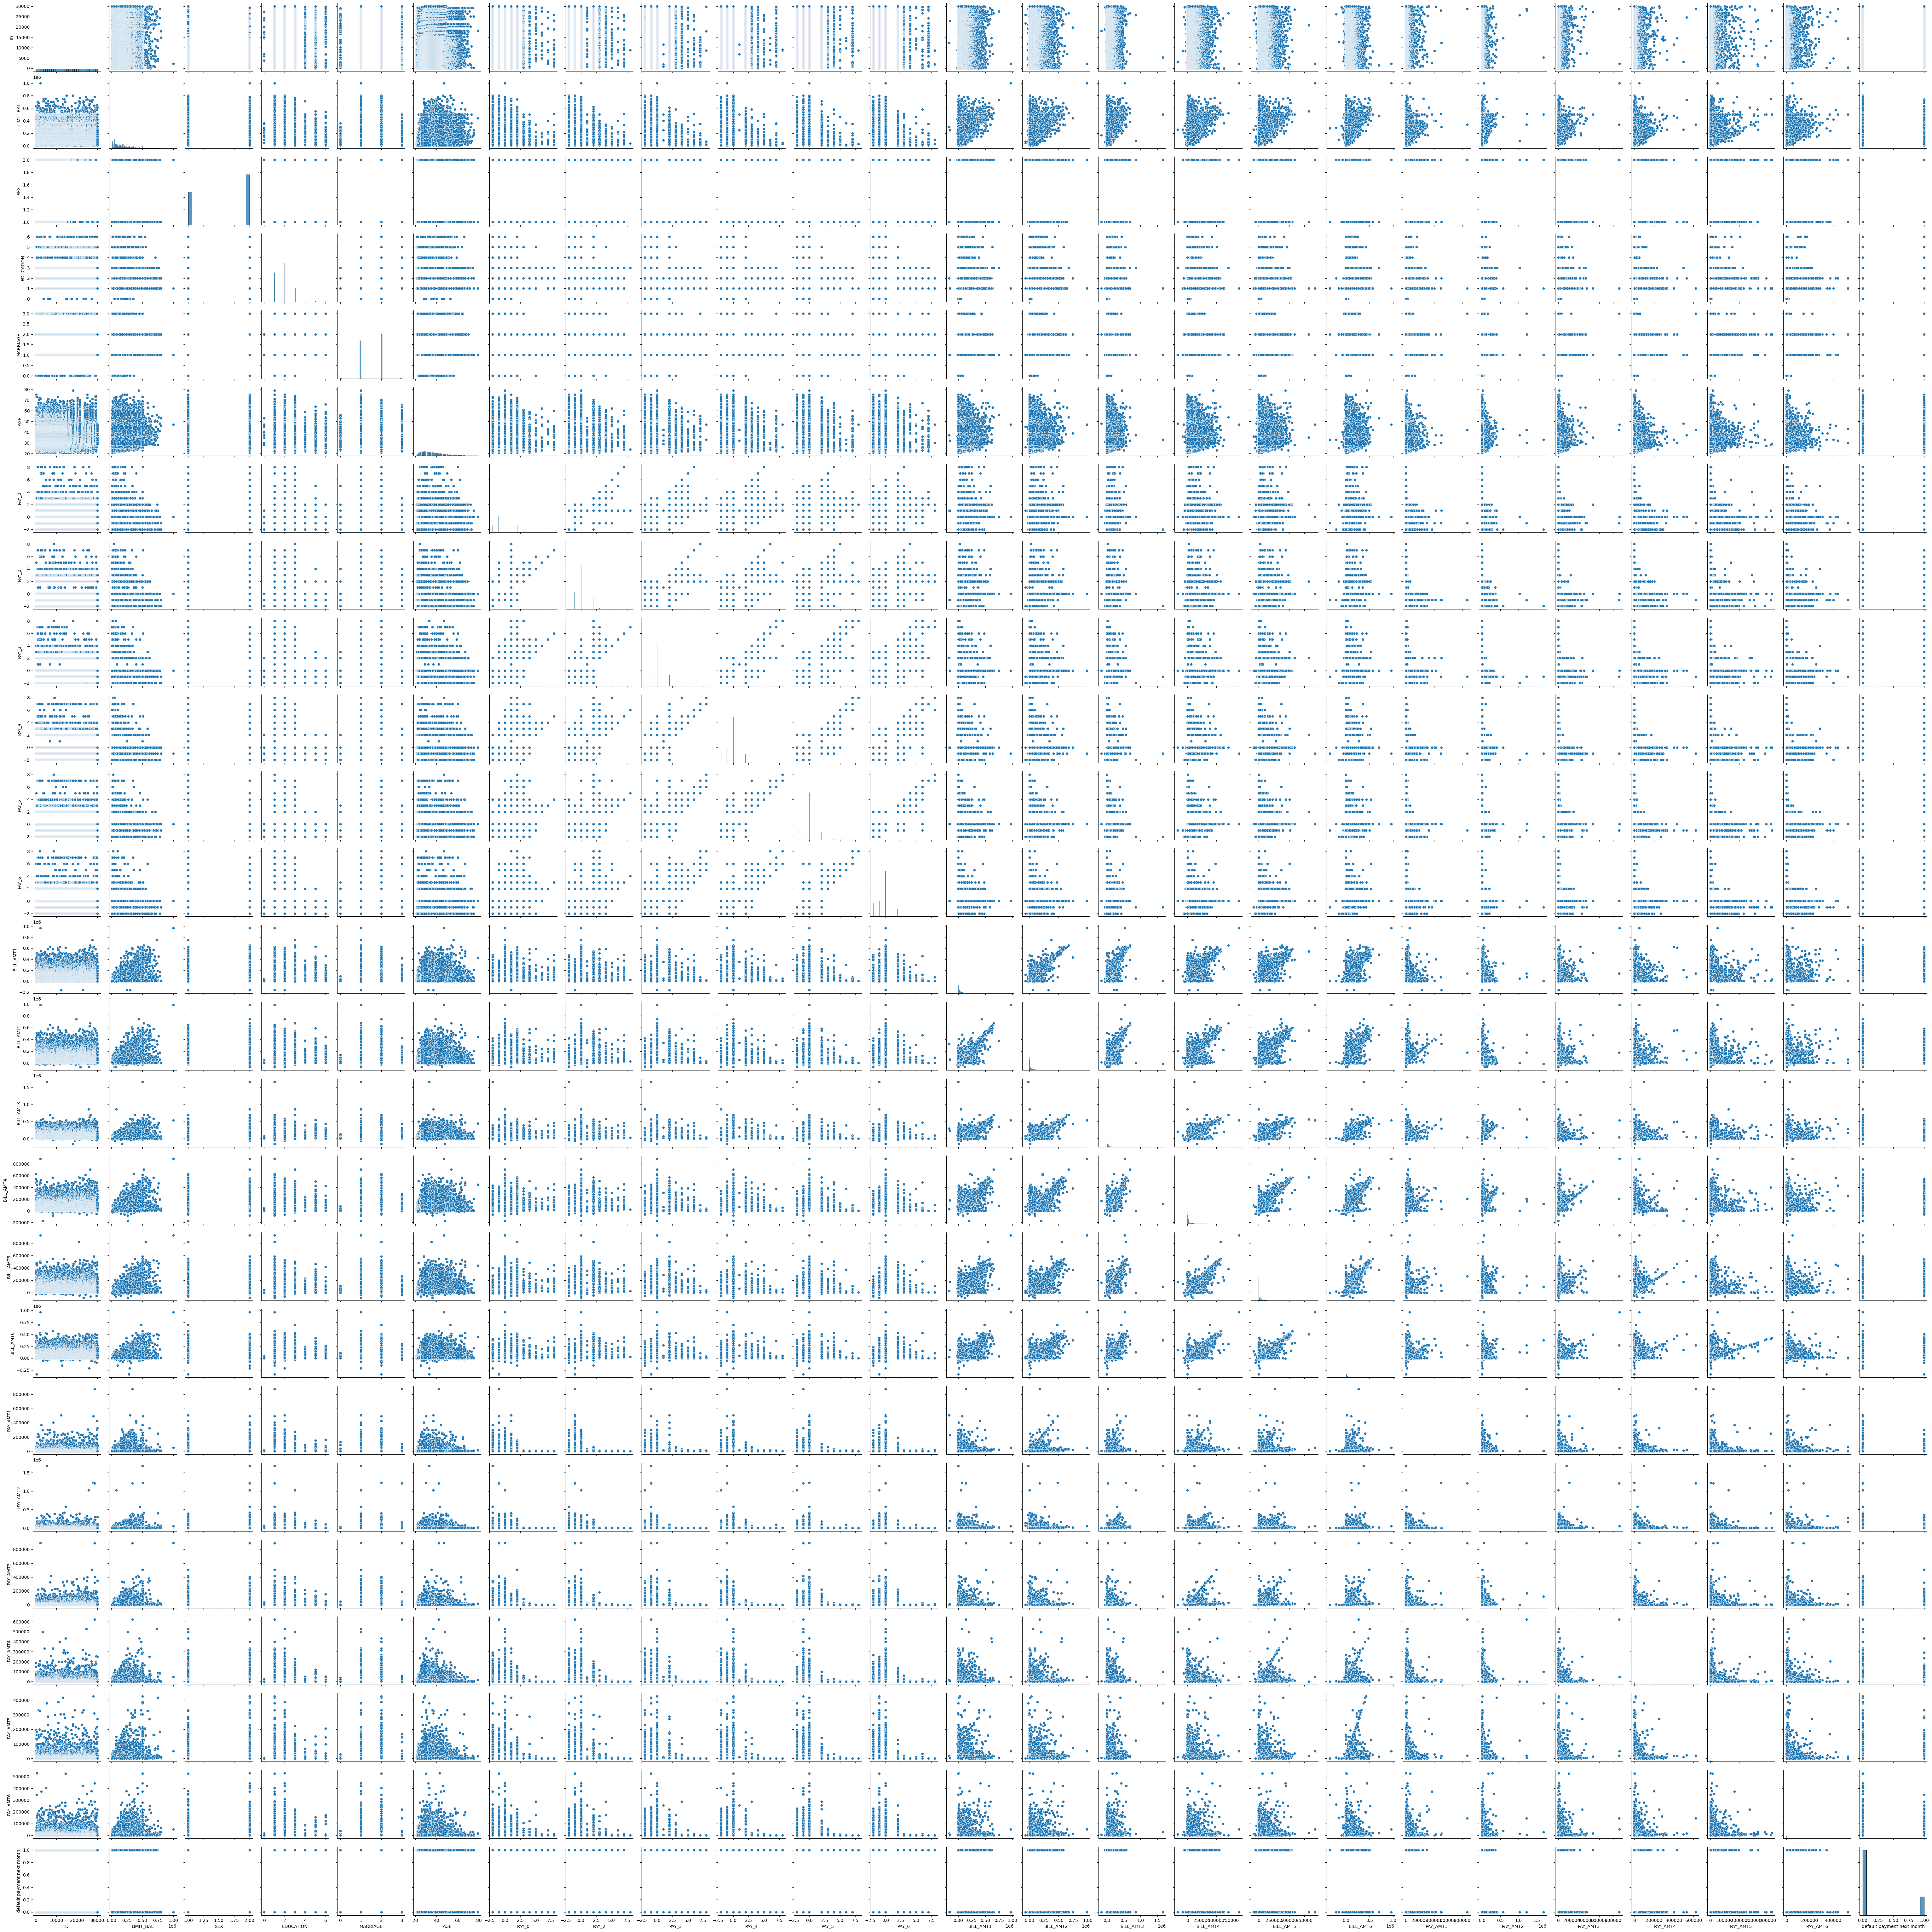

In [81]:
sns.pairplot(df)

In [113]:
df = df.drop(columns = ['id'])

In [82]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [115]:
df.head()

limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  pay_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   pay_5  ...  bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  \
0     -2  ...          0         0       689         0         0         0   
1      0  ...       3261         0      1000      1000      1000         0   
2      0  ...      15549      1518      1500      1000      1000      1000   
3      0  ...      29547      2000      2019      1200      1100      1069   
4      0  ...      19131      2000     36681     10000      9000       689   

   pay_amt6  default_payment_next_month  totalbillamt  totalpayamt  
0         0                           1          7704          689  
1      2000                           1         17077         5000  
2      5000                           0        101653        11018  
3      1000                           0        231334         8388  
4       679                           0        109339        59049  

[5 rows x 26 columns]

In [84]:
df.isna().sum()

id                            0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default_payment_next_month    0
dtype: int64

In [85]:
df.duplicated().sum()

0

In [86]:
df.dtypes

id                            int64
limit_bal                     int64
sex                           int64
education                     int64
marriage                      int64
age                           int64
pay_0                         int64
pay_2                         int64
pay_3                         int64
pay_4                         int64
pay_5                         int64
pay_6                         int64
bill_amt1                     int64
bill_amt2                     int64
bill_amt3                     int64
bill_amt4                     int64
bill_amt5                     int64
bill_amt6                     int64
pay_amt1                      int64
pay_amt2                      int64
pay_amt3                      int64
pay_amt4                      int64
pay_amt5                      int64
pay_amt6                      int64
default_payment_next_month    int64
dtype: object

### Feature Engineering

In [88]:
df['totalbillamt'] = df[['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']].sum(axis=1)

In [103]:
df['totalpayamt'] = df[['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']].sum(axis=1)

In [214]:
df['limit_bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

In [105]:
df.head()

id  limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  pay_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  bill_amt6  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0  ...          0         0       689         0         0         0         0   
1  ...       3261         0      1000      1000      1000         0      2000   
2  ...      15549      1518      1500      1000      1000      1000      5000   
3  ...      29547      2000      2019      1200      1100      1069      1000   
4  ...      19131      2000     36681     10000      9000       689       679   

   default_payment_next_month  totalbillamt  totalpayamt  
0                           1          7704          689  
1                           1         17077         5000  
2                           0        101653        11018  
3                           0        231334         8388  
4                           0        109339        59049  

[5 rows x 27 columns]

In [135]:
# Create a new column 'fullrepayment' where 1 means full repayment, 0 means not fully repaid
df['fullrepayment'] = (df['totalpayamt'] >= df['totalbillamt']).astype(int)

# Display the first few rows
df.head()


limit_bal  sex  education  marriage  age  pay_0  pay_2  pay_3  pay_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   

   pay_5  ...  pay_amt1  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0     -2  ...         0       689         0         0         0         0   
1      0  ...         0      1000      1000      1000         0      2000   
2      0  ...      1518      1500      1000      1000      1000      5000   
3      0  ...      2000      2019      1200      1100      1069      1000   
4      0  ...      2000     36681     10000      9000       689       679   

   default_payment_next_month  totalbillamt  totalpayamt  fullrepayment  
0                           1          7704          689              0  
1                           1         17077         5000              0  
2                           0        101653        11018              0  
3                           0        231334         8388              0  
4                           0        109339        59049              0  

[5 rows x 27 columns]

In [155]:
df['fullrepayment'].value_counts().unique()

array([25396,  4604], dtype=int64)

In [157]:
df['default_payment_next_month'].value_counts().unique()

array([23364,  6636], dtype=int64)

## EDA

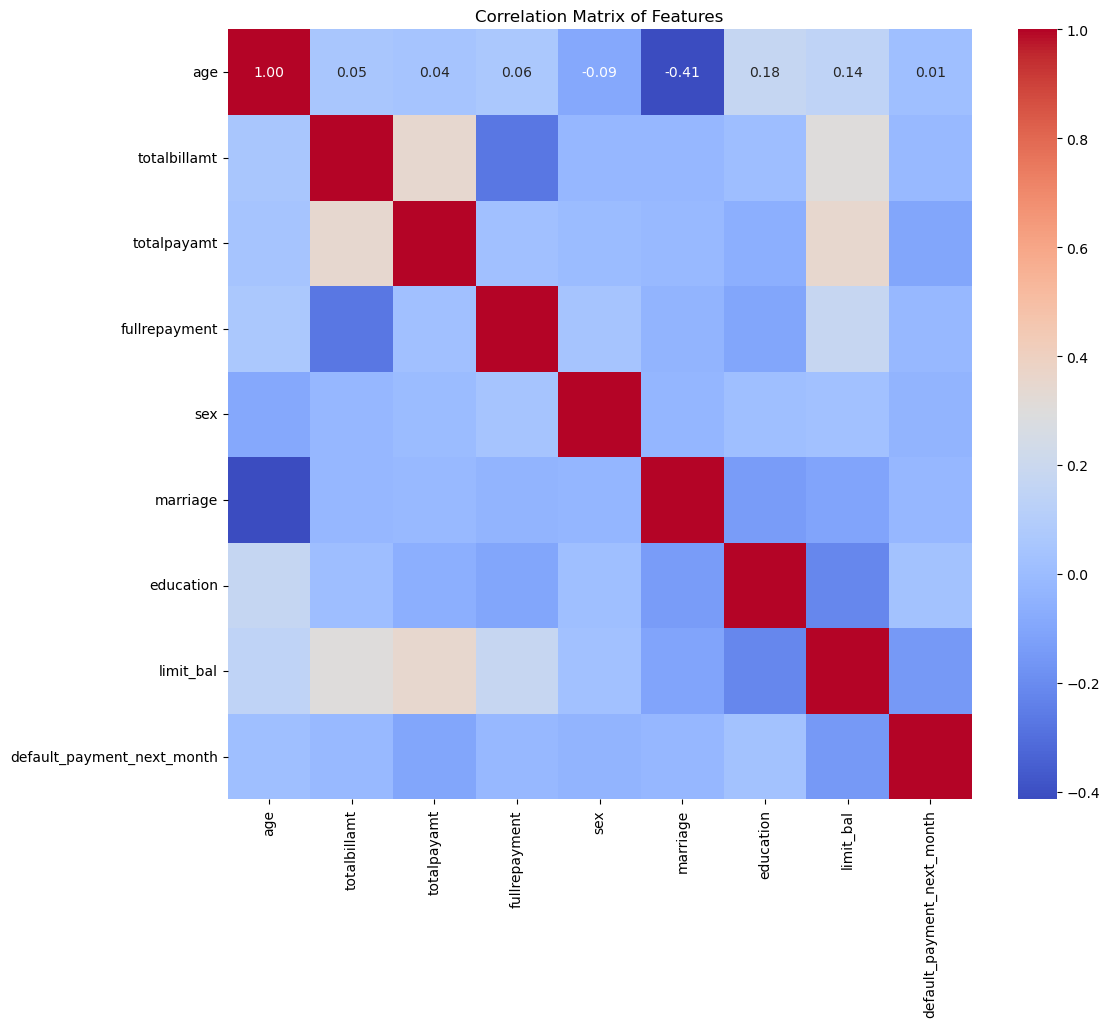

In [195]:
correlation_matrix = df[['age', 'totalbillamt', 'totalpayamt','fullrepayment', 'sex', 'marriage', 'education', 'limit_bal', 'default_payment_next_month']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

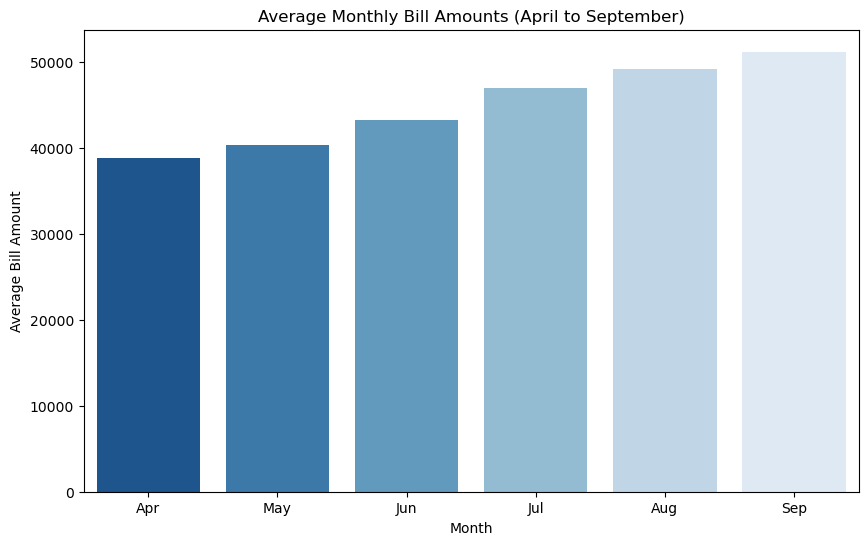

In [198]:
#Reverse the order of bill amounts (originally from September to April)
bill_columns = ['bill_amt6', 'bill_amt5', 'bill_amt4', 'bill_amt3', 'bill_amt2', 'bill_amt1']
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'] 

# Calculate the mean bill amount for each month
mean_bills = df[bill_columns].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=mean_bills, palette='Blues_r')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Bill Amount')
plt.title('Average Monthly Bill Amounts (April to September)')
plt.show()


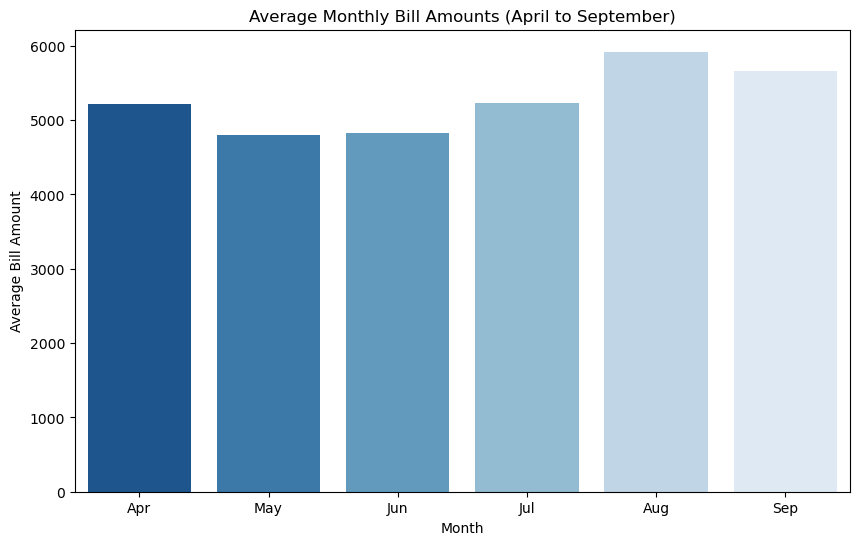

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reverse the order of bill amounts (originally from September to April)
pay_columns = ['pay_amt6', 'pay_amt5', 'pay_amt4', 'pay_amt3', 'pay_amt2', 'pay_amt1']
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']  # Correct month order

# Calculate the mean bill amount for each month
mean_pay = df[pay_columns].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=mean_pay, palette='Blues_r')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Bill Amount')
plt.title('Average Monthly Bill Amounts (April to September)')
plt.show()


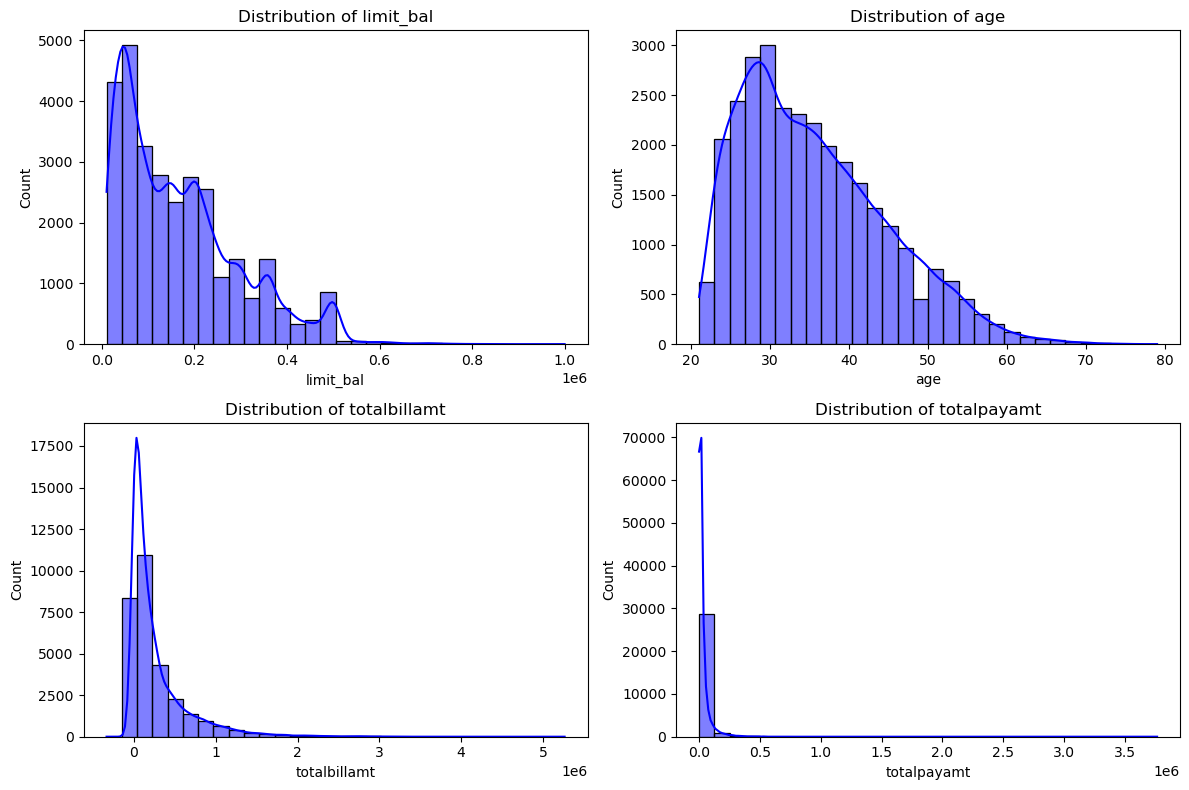

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
num_cols = ['limit_bal', 'age', 'totalbillamt', 'totalpayamt']

# Plot distribution
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


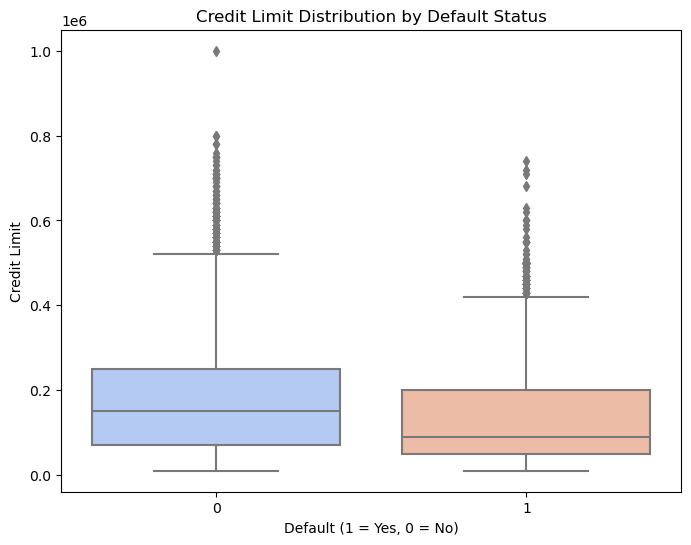

In [212]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['default_payment_next_month'], y=df['limit_bal'], palette="coolwarm")
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Credit Limit')
plt.title('Credit Limit Distribution by Default Status')
plt.show()

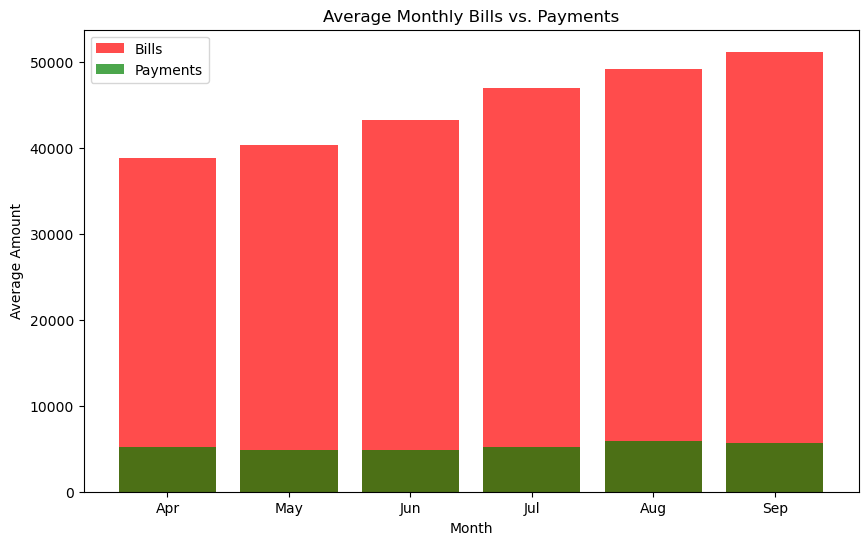

In [216]:
# Reverse order of columns (April to September)
bill_cols = ['bill_amt6', 'bill_amt5', 'bill_amt4', 'bill_amt3', 'bill_amt2', 'bill_amt1']
pay_cols = ['pay_amt6', 'pay_amt5', 'pay_amt4', 'pay_amt3', 'pay_amt2', 'pay_amt1']
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

# Compute means
mean_bills = df[bill_cols].mean()
mean_payments = df[pay_cols].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(months, mean_bills, alpha=0.7, label='Bills', color='red')
plt.bar(months, mean_payments, alpha=0.7, label='Payments', color='green')

plt.xlabel('Month')
plt.ylabel('Average Amount')
plt.title('Average Monthly Bills vs. Payments')
plt.legend()
plt.show()


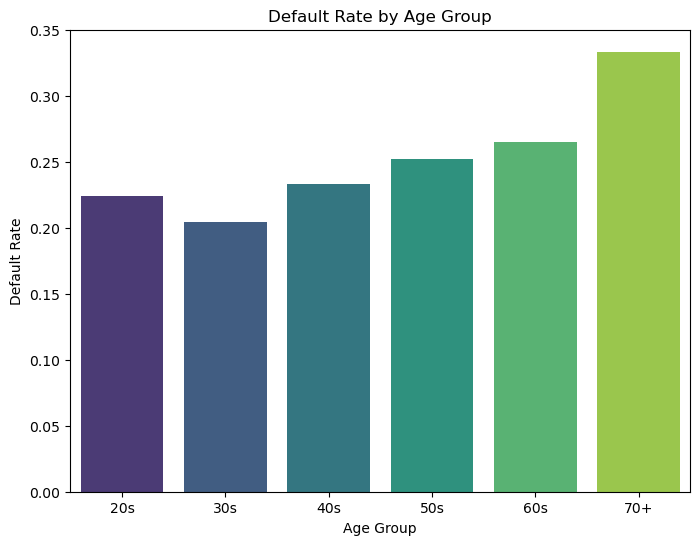

In [230]:
df['age_group'] = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20s', '30s', '40s', '50s', '60s', '70+'])
age_default = df.groupby('age_group')['default_payment_next_month'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_default.index, y=age_default.values, palette='viridis')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.title('Default Rate by Age Group')
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

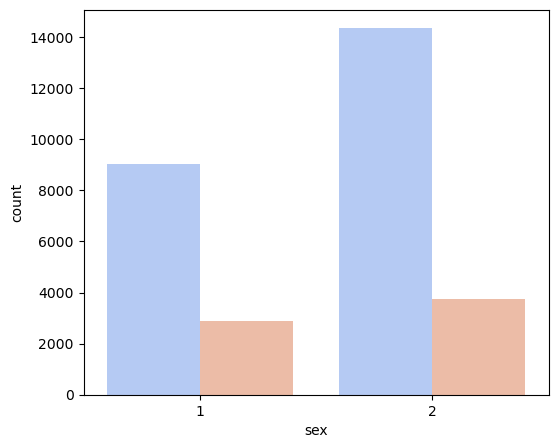

In [234]:
plt.figure(figsize=(6, 5))
sns.countplot(x='sex', hue='default_payment_next_month', data=df, palette='coolwarm')
plt.xlabel('Sex (1 = Male, 2 = Female)')
plt.ylabel('Count')
plt.title('Gender-wise Default Distribution')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

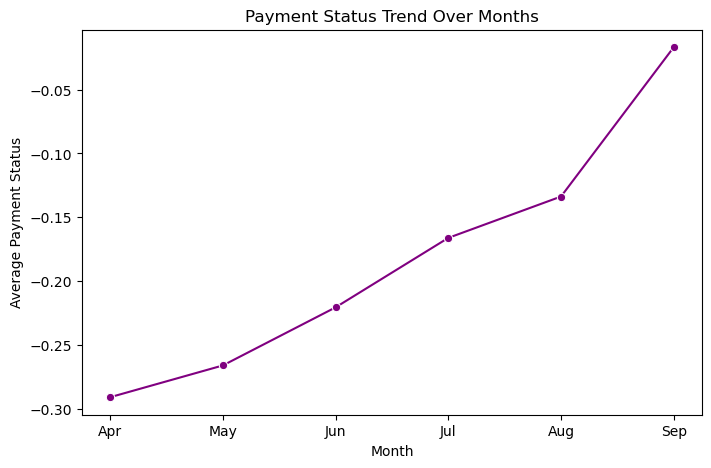

In [236]:
# Reverse the order of columns
pay_status_cols = ['pay_6', 'pay_5', 'pay_4', 'pay_3', 'pay_2', 'pay_0']
months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

# Calculate the mean payment status per month
pay_trends = df[pay_status_cols].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=months, y=pay_trends, marker="o", color='purple')
plt.xlabel('Month')
plt.ylabel('Average Payment Status')
plt.title('Payment Status Trend Over Months')
plt.show()


## Preprocessing

In [169]:
categorical_columns = ['sex', 'education', 'marriage']
df[categorical_columns] = df[categorical_columns].astype('category')

In [175]:
df['default_payment_next_month'] = df['default_payment_next_month'].astype(int)


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   limit_bal                   30000 non-null  int64   
 1   sex                         30000 non-null  category
 2   education                   30000 non-null  category
 3   marriage                    30000 non-null  category
 4   age                         30000 non-null  int64   
 5   pay_0                       30000 non-null  int64   
 6   pay_2                       30000 non-null  int64   
 7   pay_3                       30000 non-null  int64   
 8   pay_4                       30000 non-null  int64   
 9   pay_5                       30000 non-null  int64   
 10  pay_6                       30000 non-null  int64   
 11  bill_amt1                   30000 non-null  int64   
 12  bill_amt2                   30000 non-null  int64   
 13  bill_amt3       

## Modelling

## Model evaluation

## Conclusion and Recommendation